# Scrape the Fact Check home page (https://www.abc.net.au/news/factcheck/) to collect all the articles url and identify which of them have a tweet as a source

## In the home page there are three sources for web scraping fact check articles
## 1. Featured articles.
## 2. Default (initial) Latest Fact Check articles.
## 3. Fact Check articles loaded on every click on "Load More Stories" button at the end the home page.

In [1]:
from utils import *

In [2]:
## this list will contain all (i.e., from each of 3 sources mentioned above) the fact check url articles to scrape later when searching for tweet-related info
articles_url_to_scrape = []

# this list will store the type of source of the article (i.e., featured, latest, or after pagination)
articles_type = []

In [3]:
main_url = "https://www.abc.net.au/news/factcheck/"
prefix_url = "https://www.abc.net.au"
main_response = requests.get(main_url)
main_soup = BeautifulSoup(main_response.text, "html.parser")

## 1. Extracting "featured" articles

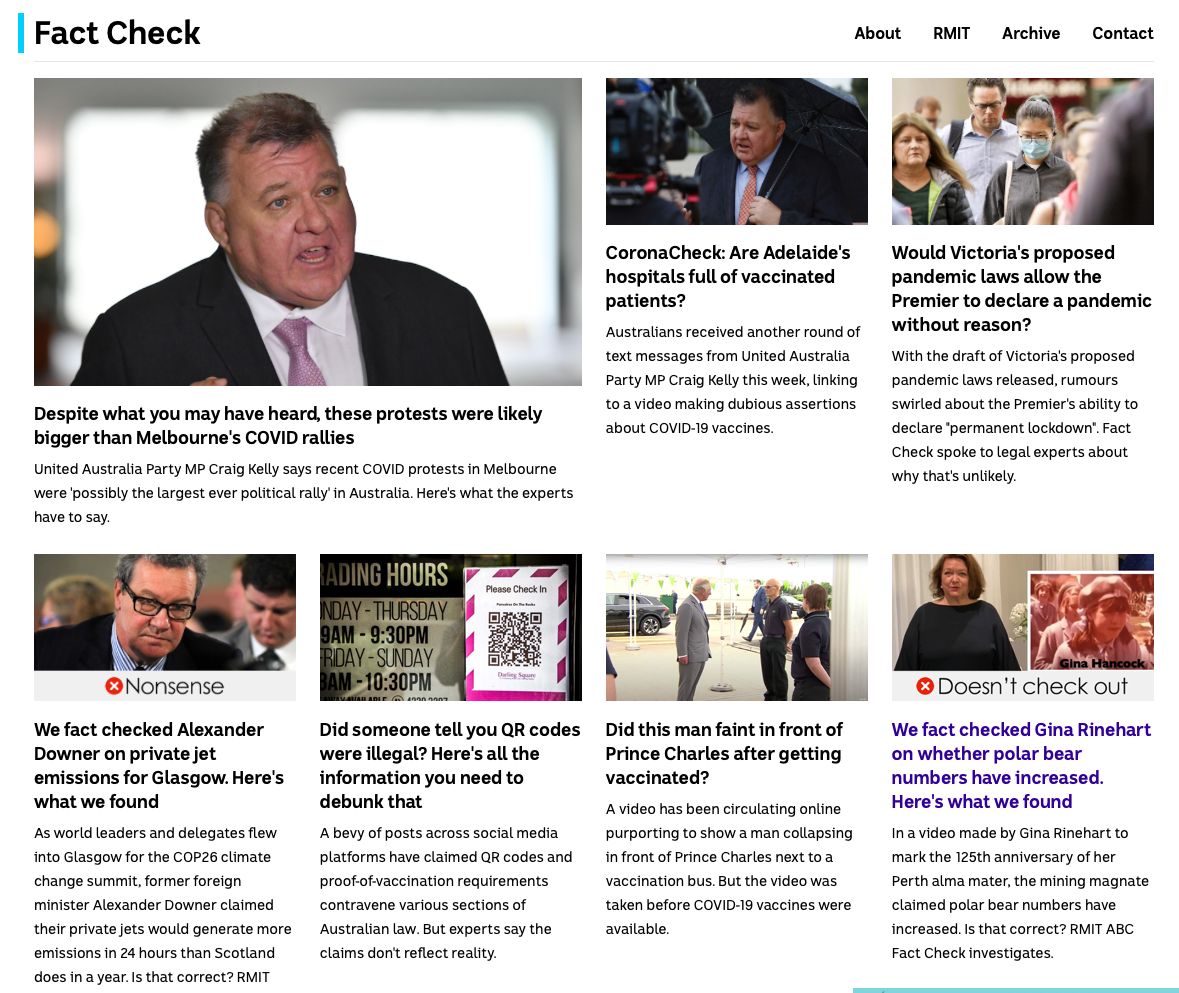

In [4]:
all_featured = main_soup.find_all("div",  {"data-component": "Featured"} )
if len(all_featured)>0:
    all_factcheck_links = all_featured[0].find_all("a",  {"data-component": "Link"} )
    for a in all_factcheck_links:
        article_url_to_scrape = prefix_url + a['href']
        if article_url_to_scrape not in articles_url_to_scrape:
            print(article_url_to_scrape)
            articles_url_to_scrape.append(article_url_to_scrape)
            articles_type.append('featured')

https://www.abc.net.au/news/2021-11-26/coronacheck-melbourne-covid-protest-crowd-size/100650146
https://www.abc.net.au/news/2021-11-19/coronacheck-craig-kelly-more-texts-united-australia-party/100630886
https://www.abc.net.au/news/2021-11-12/coronacheck-daniel-andrews-new-proposed-pandemic-laws/100613606
https://www.abc.net.au/news/2021-11-10/fact-check-private-jets-alexander-downer/100606692
https://www.abc.net.au/news/2021-11-05/coronacheck-qr-codes-do-not-breach-australian-law/100593754
https://www.abc.net.au/news/2021-10-29/coronacheck-prince-charles-fainting-man/100576262
https://www.abc.net.au/news/2021-10-27/fact-check-gina-rinehart-polar-bears/100569118


## 2. Extracting default Latest Fact Check articles

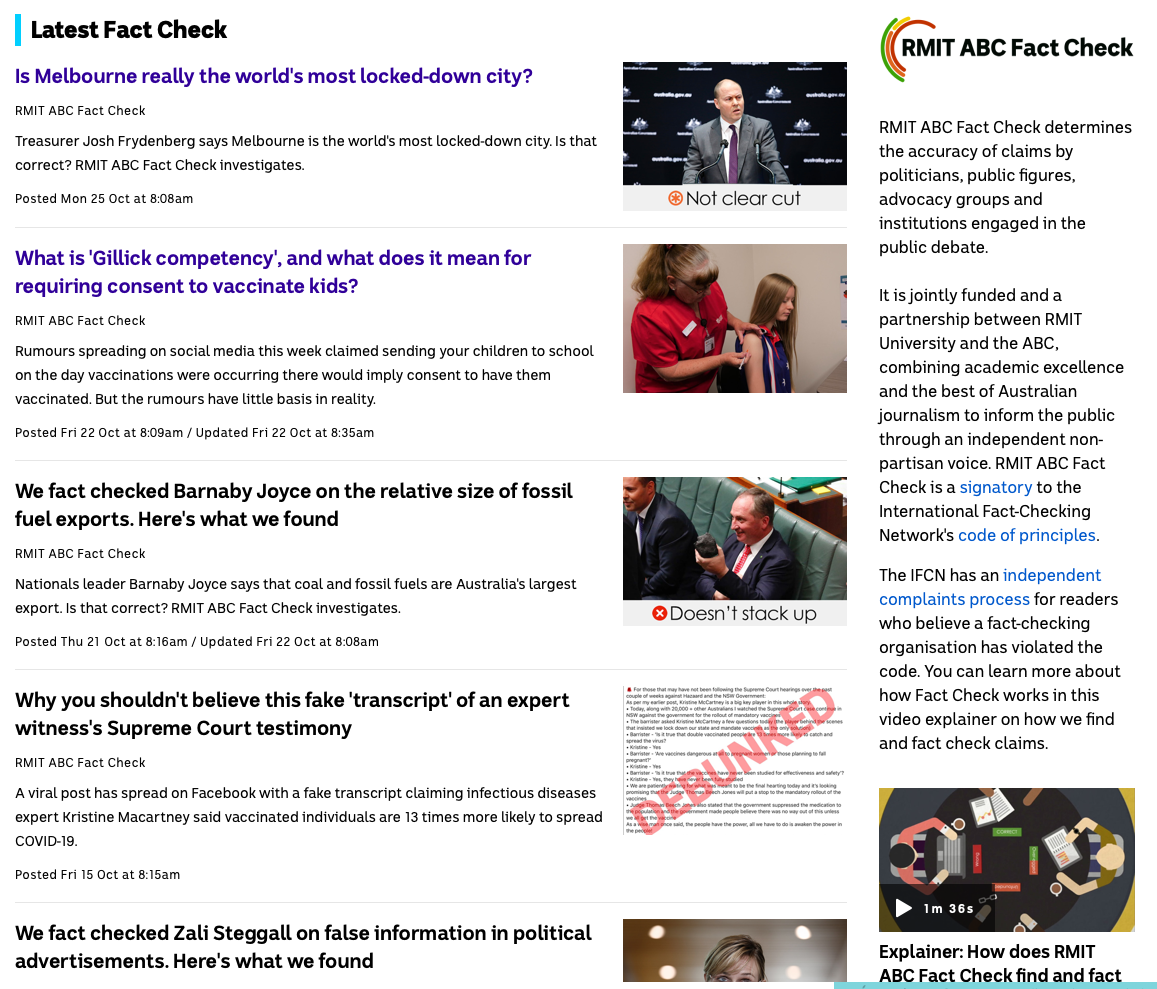

In [5]:
all_default_lastest_fack_check = main_soup.find_all("div",  {"data-component": "PaginationList"} )
if len(all_default_lastest_fack_check)>0:
    all_factcheck_links = all_default_lastest_fack_check[0].find_all("a",  {"data-component": "Link"} )
    for a in all_factcheck_links:
        article_url_to_scrape = prefix_url + a['href']
        if article_url_to_scrape not in articles_url_to_scrape:
            print(article_url_to_scrape)
            articles_url_to_scrape.append(article_url_to_scrape)
            articles_type.append('default latest')

https://www.abc.net.au/news/2021-10-25/fact-check-is-melbourne-most-locked-down-city/100560172
https://www.abc.net.au/news/2021-10-22/coronacheck-vaccinations-in-schools-informed-consent/100556640
https://www.abc.net.au/news/2021-10-21/are-fossil-fuels-australia-s-largest-export-barnaby-joyce/100553352
https://www.abc.net.au/news/2021-10-15/coronacheck-nsw-supreme-court-transcript-fake/100539064
https://www.abc.net.au/news/2021-10-13/fact-check-is-it-perfectly-legal-to-lie-in-a-political-ad-/100511796
https://www.abc.net.au/news/2021-10-08/coronacheck-poland-viral-video-embassy-protest/100521346
https://www.abc.net.au/news/2021-10-06/morrison-businesses-refusing-unvaccinated-customers/100512488
https://www.abc.net.au/news/2021-10-01/coronacheck-martin-foley-vaccination-gaffe/100504420
https://www.abc.net.au/news/2021-09-24/coronacheck-dan-andrews-medicare-voice-recording/100485564


## 3. Extracting articles from "Load More Stories" button

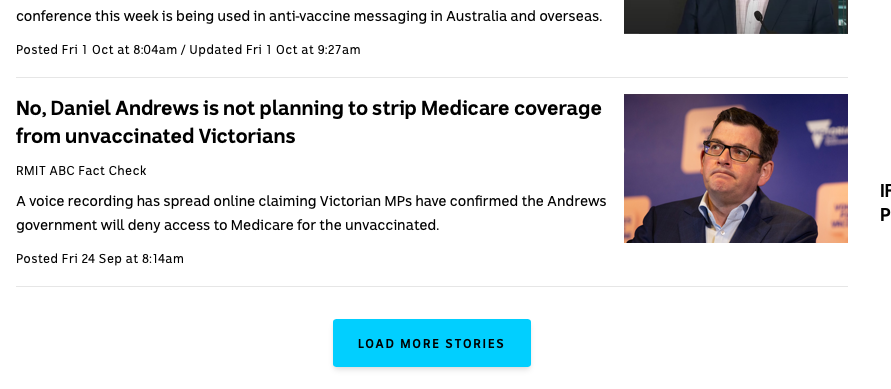

### To collect all the information loaded after clicking on "Load More Stories" (LMS) button, I decided to use Chrome DevTools to inspect the request sent by the page after clicking on LMS button. Follow the steps shown below to see how to do so.

### At the end of the url in step 3, there are three important parameters for the pagination. These parameters are more readable in step 5. On every click of LMS button, the offset number increase. In the code below, I use these parameters to extract all the articles "stored" in LMS button.

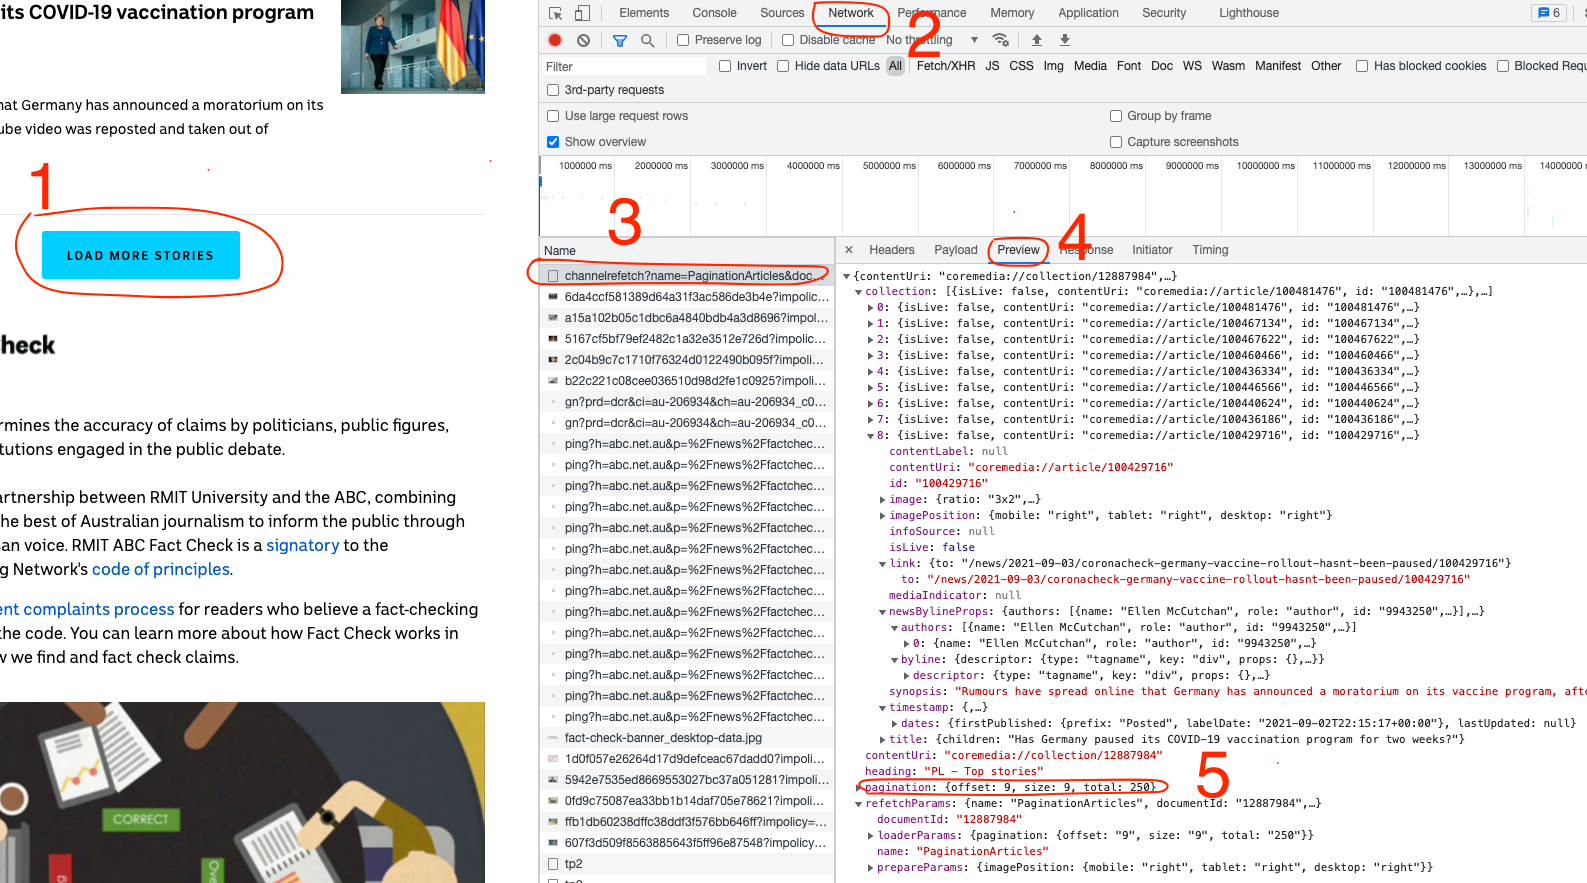

In [6]:
#url_pagination is the url in step 3 (above figure) that is captured in the first time the LMS button is clicked on.
url_pagination = "https://www.abc.net.au/news-web/api/loader/channelrefetch?name=PaginationArticles&documentId=12887984&prepareParams=%7B%22imagePosition%22:%7B%22mobile%22:%22right%22,%22tablet%22:%22right%22,%22desktop%22:%22right%22%7D%7D&loaderParams=%7B%22pagination%22:%7B%22size%22:9%7D%7D&offset=9&size=9&total=250"

article_max_number = int(url_pagination.split("=")[-1])
# print(article_max_number)
number_already_loaded_articles = int(url_pagination.split("=")[-2].split("&")[0])
# print(number_already_loaded_articles)
number_articles_to_load = int(url_pagination.split("=")[-3].split("&")[0])
# print(number_articles_to_load)
pagination_response = requests.get(url_pagination)

In [7]:
while(number_already_loaded_articles+number_articles_to_load < article_max_number):
    cur_url_pagination = "https://www.abc.net.au/news-web/api/loader/channelrefetch?name=PaginationArticles&documentId=12887984&prepareParams=%7B%22imagePosition%22:%7B%22mobile%22:%22right%22,%22tablet%22:%22right%22,%22desktop%22:%22right%22%7D%7D&loaderParams=%7B%22pagination%22:%7B%22size%22:9%7D%7D&offset="+str(number_already_loaded_articles)+"&size="+str(number_articles_to_load)+"&total=250"
    cur_response = requests.get(cur_url_pagination)
    cur_response_json = json.loads(cur_response.text)
    
    all_collected_metadata = cur_response_json['collection']
    for collected_metadata in all_collected_metadata:
        article_url_to_scrape = prefix_url + collected_metadata['link']['to']
        if article_url_to_scrape not in articles_url_to_scrape:
            print(article_url_to_scrape)
            articles_url_to_scrape.append(article_url_to_scrape)
            articles_type.append('pagination latest')
    
    #increase the number of already loaded articles
    number_already_loaded_articles += len(all_collected_metadata)
    print("\nnumber of already loaded articles", number_already_loaded_articles)

https://www.abc.net.au/news/2021-09-23/fact-check-annastacia-palaszczuk-doherty-modelling/100481476
https://www.abc.net.au/news/2021-09-21/fact-check-teenagers-with-covid-19-ending-up-in-hospital/100467134
https://www.abc.net.au/news/2021-09-17/coronacheck-nicki-minaj-swollen-testicles-covid-19-vaccine/100467622
https://www.abc.net.au/news/2021-09-15/fact-check-misinformation-study/100460466
https://www.abc.net.au/news/2021-09-14/fact-check-does-australia-s-resettlement-of-refugees-rank-third/100436334
https://www.abc.net.au/news/2021-09-10/coronacheck-craig-kelly-text-messages/100446566
https://www.abc.net.au/news/2021-09-08/reality-check-ivermectin-covid19/100440624
https://www.abc.net.au/news/2021-09-07/fact-check-did-real-wages-fall-2-1-per-cent/100436186
https://www.abc.net.au/news/2021-09-03/coronacheck-germany-vaccine-rollout-hasnt-been-paused/100429716

number of already loaded articles 18
https://www.abc.net.au/news/2021-08-31/fact-check-clive-palmer-vaccine-passports-breach-c

https://www.abc.net.au/news/2020-10-01/fact-check-was-victorias-lockdown-most-severe-oustide-wuhan/12690432
https://www.abc.net.au/news/2020-09-25/coronacheck-scott-morrison-sweden-coronavirus-deaths/12698478
https://www.abc.net.au/news/2020-09-21/fact-check-would-sydney-be-under-curfew-melbourne-lockdown-vic/12664546
https://www.abc.net.au/news/2020-09-18/clive-palmer-western-australia-hard-border-suicides-covid-19/12674076
https://www.abc.net.au/news/2020-09-16/fact-file-mandatory-vaccination-is-it-possible/12661804
https://www.abc.net.au/news/2020-09-15/fact-file-emergency-powers-state-of-emergency-lockdown-victoria/12660726
https://www.abc.net.au/news/2020-09-11/coronacheck-daniel-andrews-testing-increase-protest-covid-19/12649712
https://www.abc.net.au/news/2020-09-10/fact-check-aged-care-funding-accountability/12607618
https://www.abc.net.au/news/2020-09-04/coronacheck-berlin-anti-lockdown-protest-freedom-day-covid-19/12626478

number of already loaded articles 99
https://www.abc

https://www.abc.net.au/news/2019-11-14/fact-check-did-high-fire-danger-indices-come-earlier-this-year/11506082
https://www.abc.net.au/news/2019-11-12/zombie-did-the-government-cut-1-point-2-billion-from-aged-care/11687258
https://www.abc.net.au/news/2019-11-08/fact-check-carbon-emissions-under-the-coalition/11662018
https://www.abc.net.au/news/2019-10-24/zombie---angus-taylor-emissions-abatement-kyoto-protocol/11630780
https://www.abc.net.au/news/2019-10-10/fact-check3a-is-australia-the-only-first-world-nation-with-a-c/11583706
https://www.abc.net.au/news/2019-10-03/fact-check-barnaby-joyce-poorest-electorates/11437932
https://www.abc.net.au/news/2019-09-30/morrison-un-speech/11553594
https://www.abc.net.au/news/2019-09-23/fact-check3a-are-the-rules-of-confession-in-the-bible3f/11528838
https://www.abc.net.au/news/2019-09-13/did-the-coalition-inherit-an-emissions-deficit-scott-morrison/11506064

number of already loaded articles 180
https://www.abc.net.au/news/2019-09-12/is-renewable-p

# At the moment we have collected all the urls from fact check articles in the home page. Next step is to identify which of them come from a tweet source.

In [8]:
print("Total number of urls to scrape: ", len(articles_url_to_scrape))

Total number of urls to scrape:  250


## Search for tweet source information in the list of articles url to scrape. For more accurate results we are inspecting only in the words tweet or twitter are mentioned in the claim section.

In [9]:
has_tweet_source = []
location_tweet_source = []
all_quoted_claims = []
all_original_tweets = []
for article_url_to_scrape in articles_url_to_scrape:
    print(article_url_to_scrape)
    response = requests.get(article_url_to_scrape)
    soup = BeautifulSoup(response.text, "html.parser")
    
    metas = soup.find_all('meta')
    published_time = extractFromMeta(metas, "published_time")
    if published_time != "":
        since_tstamp, until_tstamp = getSinceUntilTimestamps(published_time, 2)

        text_in_claim = getTextInClaim(soup) #Extract the text in "The Claim" section
        state, where_in_text = hasTweetSource(text_in_claim)
        quoted_claims = re.findall(r'"(.*?)"', text_in_claim)
        original_tweets = getOriginalTweets(quoted_claims, since_tstamp, until_tstamp, 50)
    else:
        state = "Error while scraping article url. Check article format"
        where_in_text =  ["Error while scraping article url. Check article format"]
        quoted_claims = ["Error while scraping article url. Check article format"]
        original_tweets = ["Error while scraping article url. Check article format"]
        
    has_tweet_source.append(str(state))
    location_tweet_source.append(where_in_text)
    all_quoted_claims.append(quoted_claims)
    all_original_tweets.append(original_tweets)
    
    print('\t' + str(state))
    print("where in text: ", where_in_text)
    print("quoted claims: ", quoted_claims)
    print("original tweets: ", original_tweets)
    print("\n")

https://www.abc.net.au/news/2021-11-26/coronacheck-melbourne-covid-protest-crowd-size/100650146
	False
where in text:  
quoted claims:  ['possibly the largest ever political rally in Australia']
original tweets:  ['www.twitter.com/CraigKellyMP/status/1460754227769212930']


https://www.abc.net.au/news/2021-11-19/coronacheck-craig-kelly-more-texts-united-australia-party/100630886
	False
where in text:  
quoted claims:  []
original tweets:  []


https://www.abc.net.au/news/2021-11-12/coronacheck-daniel-andrews-new-proposed-pandemic-laws/100613606
	False
where in text:  
quoted claims:  []
original tweets:  []


https://www.abc.net.au/news/2021-11-10/fact-check-private-jets-alexander-downer/100606692
	True
where in text:  ['Twitter.']
quoted claims:  ['There are 400 private jets ferrying delegations to the COP26 conference. @POTUS  brought five. It is estimated they will emit in 24 hours as much CO2 as Scotland emits in a year!,']
original tweets:  ['www.twitter.com/AlexanderDowner/status

	False
where in text:  
quoted claims:  ['These are the harshest measures any place in Australia has ever faced,', 'I want to stress this point, that we have the harshest lockdown conditions that any state in Australia has seen']
original tweets:  ['www.twitter.com/Raf_Epstein/status/1420561970713960449', 'No tweets found']


https://www.abc.net.au/news/2021-08-20/coronacheck-poland-pfizer-doses-misinformation/100391090
	False
where in text:  
quoted claims:  []
original tweets:  []


https://www.abc.net.au/news/2021-08-17/fact-check-childcare-subsidies-alan-tudge/100370226
	False
where in text:  
quoted claims:  ['failed', 'abysmally short', "We've increased childcare subsidies by 77 per cent since we came to office,"]
original tweets:  ['www.twitter.com/irenekeller/status/1427240101579427840', 'www.twitter.com/kaymbeals/status/1407341896314335234', 'No tweets found']


https://www.abc.net.au/news/2021-08-13/coronacheck-george-christensen-speech-parliament-lockdown-masks/100372200
	Fa

	False
where in text:  
quoted claims:  ['It is true that at this stage of our rollout, it is actually better than where Germany was, better than where New Zealand was, better than where South Korea and Japan was, and so I think there will be some important context in the weeks ahead as we see the significant ramp up of the distribution network,']
original tweets:  ['Quoted claim exceeds 280 characters']


https://www.abc.net.au/news/2021-04-30/coronacheck-menstruation-periods-vaccines-misinformation-facts/100099778
	False
where in text:  
quoted claims:  []
original tweets:  []


https://www.abc.net.au/news/2021-04-23/face-masks-coronavirus-conspiracy-theories-coronacheck/100085014
	False
where in text:  
quoted claims:  []
original tweets:  []


https://www.abc.net.au/news/2021-04-14/fact-file-rupert-murdoch-media-reach-in-australia/100056660
	False
where in text:  
quoted claims:  ['reach']
original tweets:  ['www.twitter.com/ashok_rastogi/status/1381953316146454529']


https://www.

	True
where in text:  ['tweet, Greens leader Adam Bandt said coal and gas must be kept in the ground "to have any chance of stopping runaway global warming".']
quoted claims:  ['to have any chance of stopping runaway global warming', 'Gas is as dirty as coal,', 'dirty']
original tweets:  ['www.twitter.com/AdamBandt/status/1308556998963683328', 'www.twitter.com/davidca61036773/status/1303800836590632962', 'www.twitter.com/dbnfam/status/1323216829922320391']


https://www.abc.net.au/news/2020-10-30/coronacheck-us-election-donald-trump-joe-biden-fact-check/12826498
	False
where in text:  
quoted claims:  ['pandemic']
original tweets:  ['www.twitter.com/GyeFoundation/status/1321767096729149440']


https://www.abc.net.au/news/2020-10-29/fact-check-queensland-health-workers-cuts/12819864
	False
where in text:  
quoted claims:  ["More ambos mean you spend less time waiting for an ambulance, so we've delivered 812 more", "Deb Frecklington sacked 4,400 health workers last time imagine our healt

	Error while scraping article url. Check article format
where in text:  ['Error while scraping article url. Check article format']
quoted claims:  ['Error while scraping article url. Check article format']
original tweets:  ['Error while scraping article url. Check article format']


https://www.abc.net.au/news/2020-08-07/coronacheck-craig-kelly-daniel-andrews-hydroxychloroquine-covid/12530576
	False
where in text:  
quoted claims:  []
original tweets:  []


https://www.abc.net.au/news/2020-07-31/coronacheck-clive-palmer-covid-19-comparison-hepatitis-b/12506842
	False
where in text:  
quoted claims:  []
original tweets:  []


https://www.abc.net.au/news/2020-07-29/fact-check-matt-canavan-fossil-fuel-industry-subsidies/12496310
	False
where in text:  
quoted claims:  ['fossil fuel extraction and production of energy', "There's no subsidisation of Australia's fossil fuel industries,"]
original tweets:  ['No tweets found', 'No tweets found']


https://www.abc.net.au/news/2020-07-24/corona

	False
where in text:  
quoted claims:  []
original tweets:  []


https://www.abc.net.au/news/2020-05-08/fact-check-being-unemployed-for-a-year-reduces-chances-of-work/12211296
	False
where in text:  
quoted claims:  ['Many people lived through the global financial crisis, and almost 10 years later, when we looked at the effectiveness of what was done, we left far too many people behind. The experience was that if you were out of paid work for over a year, then you almost halve your chances of ever getting back into employment.', 'We know from past experience that when someone is unemployed for over a year, their chances of securing paid work typically fall by 40 per cent.']
original tweets:  ['Quoted claim exceeds 280 characters', 'No tweets found']


https://www.abc.net.au/news/2020-05-16/coronacheck-number-16/12235726
	False
where in text:  
quoted claims:  []
original tweets:  []


https://www.abc.net.au/news/2020-05-16/coronacheck-obama-wuhan-institute-of-virology/12228386
	False


	False
where in text:  
quoted claims:  ["The Liberals love to dismiss environmentalists as 'latte sipping lefties' that want to take away Australian jobs,", 'Someone should probably tell them that making lattes provides more Australian jobs than the entire coal industry.']
original tweets:  ['No tweets found', 'www.twitter.com/shakytumbleweed/status/1219141453202329600']


https://www.abc.net.au/news/2020-02-04/fact-check-facial-recognition-darker-skin/11781192
	Error while scraping article url. Check article format
where in text:  ['Error while scraping article url. Check article format']
quoted claims:  ['Error while scraping article url. Check article format']
original tweets:  ['Error while scraping article url. Check article format']


https://www.abc.net.au/news/2020-01-31/fact-check-have-bushfires-killed-more-than-a-billion-animals/11912538
	False
where in text:  
quoted claims:  ['nationally', "The 480 million estimate was made a couple of weeks ago, and the fires have now bur

	False
where in text:  
quoted claims:  ["What we don't have in Australia is a law that basically says that you cannot discriminate against someone because of their religious beliefs,", "It does seem to be a bit of a missing link in our legal regime, that there's currently not that protection in place that says that you cannot discriminate against someone because of what they believe in,"]
original tweets:  ['No tweets found', 'No tweets found']


https://www.abc.net.au/news/2019-09-04/fact-check-nsw-abortion-law-victoria/11474570
	False
where in text:  
quoted claims:  ['Since abortion was decriminalised in Victoria in 2008, post 20 week abortions have increased by 39 per cent,']
original tweets:  ['No tweets found']


https://www.abc.net.au/news/2019-08-29/fact-check-mabo-decision-high-court-dispossession-pauline-hanson/11342504
	False
where in text:  
quoted claims:  ["Same as with Mabo, and the native title. We thought we were signing over just to Mabo because his connection with t

	Error while scraping article url. Check article format
where in text:  ['Error while scraping article url. Check article format']
quoted claims:  ['Error while scraping article url. Check article format']
original tweets:  ['Error while scraping article url. Check article format']


https://www.abc.net.au/news/2019-05-15/federal-election-fact-check-childcare-costs/11111848
	False
where in text:  
quoted claims:  ["While the Liberals have been in government, there's been a 28 per cent increase in the cost of childcare fees.", 'Wages growth in this country, under this government is at record lows, and everything is going up. Childcare is up 28 per cent,']
original tweets:  ['No tweets found', 'No tweets found']


https://www.abc.net.au/news/2019-05-14/federal-election-fact-check-clive-palmer-zombie/11108108
	Error while scraping article url. Check article format
where in text:  ['Error while scraping article url. Check article format']
quoted claims:  ['Error while scraping article url.

	False
where in text:  
quoted claims:  ['Americanised economy', 'highest rate of temporary work in the OECD and the third-highest rate of insecure work']
original tweets:  ['www.twitter.com/drchrishewitson/status/1097010896688373760', 'No tweets found']


https://www.abc.net.au/news/2019-04-11/fact-check-coalition-emissions-reduction-angus-taylor/10936652
	Error while scraping article url. Check article format
where in text:  ['Error while scraping article url. Check article format']
quoted claims:  ['Error while scraping article url. Check article format']
original tweets:  ['Error while scraping article url. Check article format']


https://www.abc.net.au/news/2019-04-08/fact-check-mediicare-out-of-pocket-costs-kristina-kenneally/10975460
	True
where in text:  ['tweeted: "Under  and the Liberals, out-of-pocket costs to visit a GP are up 25 per cent and out-of-pocket costs to visit a specialist are up 40 per cent — because of the Liberals\' & Nationals\' Medicare freeze.']
quoted cla

	False
where in text:  
quoted claims:  ['stupid', "Labor's proposal is to dismantle offshore detention  essentially give the ability for two doctors — as has been pointed out, doctors including Dr Brown, Bob Brown, and Dr Richard Di Natale — potentially can provide the advice,"]
original tweets:  ['www.twitter.com/zgfrr/status/1094654753991098368', 'No tweets found']


https://www.abc.net.au/news/2019-02-07/fact-check-does-labor-have-twice-number-of-frontbench-women-/10696844
	Error while scraping article url. Check article format
where in text:  ['Error while scraping article url. Check article format']
quoted claims:  ['Error while scraping article url. Check article format']
original tweets:  ['Error while scraping article url. Check article format']


https://www.abc.net.au/news/2019-01-30/fact-check-labors-dividend-imputation-policy/10626204
	False
where in text:  
quoted claims:  ['not fair', 'How is that fair on the lowest paid, those with low fixed incomes, those who are retir

In [13]:
df_homepage_abc_factcheck_urls = pd.DataFrame(
    {'Article Type': articles_type,
     'URL': articles_url_to_scrape,
     'Has Tweet Source?': has_tweet_source,
     'Location Tweet Source' : location_tweet_source,
     'Claims': all_quoted_claims,
     'Original tweets': all_original_tweets
    })

In [14]:
df_homepage_abc_factcheck_urls

Article Type  \
0             featured   
1             featured   
2             featured   
3             featured   
4             featured   
5             featured   
6             featured   
7       default latest   
8       default latest   
9       default latest   
10      default latest   
11      default latest   
12      default latest   
13      default latest   
14      default latest   
15      default latest   
16   pagination latest   
17   pagination latest   
18   pagination latest   
19   pagination latest   
20   pagination latest   
21   pagination latest   
22   pagination latest   
23   pagination latest   
24   pagination latest   
25   pagination latest   
26   pagination latest   
27   pagination latest   
28   pagination latest   
29   pagination latest   
30   pagination latest   
31   pagination latest   
32   pagination latest   
33   pagination latest   
34   pagination latest   
35   pagination latest   
36   pagination latest   
37   pagination latest   
38   pagination latest   
39   pagination latest   
40   pagination latest   
41   pagination latest   
42   pagination latest   
43   pagination latest   
44   pagination latest   
45   pagination latest   
46   pagination latest   
47   pagination latest   
48   pagination latest   
49   pagination latest   
50   pagination latest   
51   pagination latest   
52   pagination latest   
53   pagination latest   
54   pagination latest   
55   pagination latest   
56   pagination latest   
57   pagination latest   
58   pagination latest   
59   pagination latest   
60   pagination latest   
61   pagination latest   
62   pagination latest   
63   pagination latest   
64   pagination latest   
65   pagination latest   
66   pagination latest   
67   pagination latest   
68   pagination latest   
69   pagination latest   
70   pagination latest   
71   pagination latest   
72   pagination latest   
73   pagination latest   
74   pagination latest   
75   pagination latest   
76   pagination latest   
77   pagination latest   
78   pagination latest   
79   pagination latest   
80   pagination latest   
81   pagination latest   
82   pagination latest   
83   pagination latest   
84   pagination latest   
85   pagination latest   
86   pagination latest   
87   pagination latest   
88   pagination latest   
89   pagination latest   
90   pagination latest   
91   pagination latest   
92   pagination latest   
93   pagination latest   
94   pagination latest   
95   pagination latest   
96   pagination latest   
97   pagination latest   
98   pagination latest   
99   pagination latest   
100  pagination latest   
101  pagination latest   
102  pagination latest   
103  pagination latest   
104  pagination latest   
105  pagination latest   
106  pagination latest   
107  pagination latest   
108  pagination latest   
109  pagination latest   
110  pagination latest   
111  pagination latest   
112  pagination latest   
113  pagination latest   
114  pagination latest   
115  pagination latest   
116  pagination latest   
117  pagination latest   
118  pagination latest   
119  pagination latest   
120  pagination latest   
121  pagination latest   
122  pagination latest   
123  pagination latest   
124  pagination latest   
125  pagination latest   
126  pagination latest   
127  pagination latest   
128  pagination latest   
129  pagination latest   
130  pagination latest   
131  pagination latest   
132  pagination latest   
133  pagination latest   
134  pagination latest   
135  pagination latest   
136  pagination latest   
137  pagination latest   
138  pagination latest   
139  pagination latest   
140  pagination latest   
141  pagination latest   
142  pagination latest   
143  pagination latest   
144  pagination latest   
145  pagination latest   
146  pagination latest   
147  pagination latest   
148  pagination latest   
149  pagination latest   
150  pagination latest   
151  pagination latest   
152  pagination latest   
153  p

In [18]:
now = datetime.now()
cur_datetime = now.strftime("%d-%m-%Y_%H-%M-%S")
df_homepage_abc_factcheck_urls.to_csv("../../resultsv2/homepage_abc_factcheck_urls_v2_"+ cur_datetime +".csv", encoding='utf-8')